## 1. Setting and Importing Libraries

In [33]:
!pip install pandas numpy matplotlib wordcloud scikit-learn nltk

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from collections import Counter
import re
import random
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bbuser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Load & Prepare Dataset

In [35]:
# Loading JSON dataset from Kaggle
df = pd.read_json(r"Datasets\News_Category_Dataset_v3.json", lines=True)


In [36]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [37]:
df.tail()

,link,headline,category,short_description,authors,date
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28
209526,https://www.huffingtonpost.com/entry/dwight-ho...,Dwight Howard Rips Teammates After Magic Loss ...,SPORTS,The five-time all-star center tore into his te...,,2012-01-28


## 3. list of the needed categories


In [46]:
categories = ["POLITICS", "TRAVEL", "SPORTS", "HOME & LIVING"]
df = df[df["category"].isin(categories)]

## 4.short_description + category

In [47]:
# short_description + category
df = df[["short_description", "category"]]

In [55]:
df

,short_description,category
17,"Maury Wills, who helped the Los Angeles Dodger...",SPORTS
21,President issues vow as tensions with China rise.,POLITICS
24,An annual celebration took on a different feel...,POLITICS
26,Las Vegas never had a professional sports cham...,SPORTS
30,"U.S. President Joe Biden, in London for the fu...",POLITICS
...,...,...
209478,"As we stepped out of the serene plantation, we...",TRAVEL
209523,"Afterward, Azarenka, more effusive with the pr...",SPORTS
209524,"Leading up to Super Bowl XLVI, the most talked...",SPORTS
209525,CORRECTION: An earlier version of this story i...,SPORTS


## 5.Balance dataset which is equals to 1000 samples per category

In [56]:
df_balanced = df.groupby("category").apply(lambda x: x.sample(1000, random_state=42)).reset_index(drop=True)

print(df_balanced["category"].value_counts())

category
HOME & LIVING    1000
POLITICS         1000
SPORTS           1000
TRAVEL           1000
Name: count, dtype: int64


C:\Users\bbuser\AppData\Local\Temp\ipykernel_22296\3273135165.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby("category").apply(lambda x: x.sample(1000, random_state=42)).reset_index(drop=True)


## 6. Stratified Train-Test Split

In [57]:
train_df, test_df = train_test_split(
    df_balanced,
    test_size=0.2,
    stratify=df_balanced["category"],
    random_state=42
)

print("Train size:", train_df.shape)
print("Test size:", test_df.shape)


Train size: (3200, 2)
Test size: (800, 2)


## 7. Text Preprocessing Function


In [58]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)   # remove punctuation & numbers
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return tokens


## 8. Word Clouds & Frequent Words

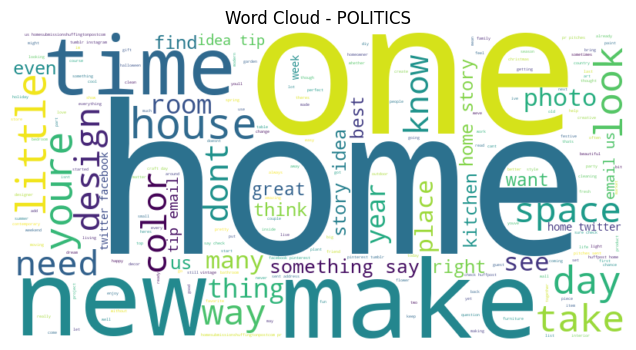

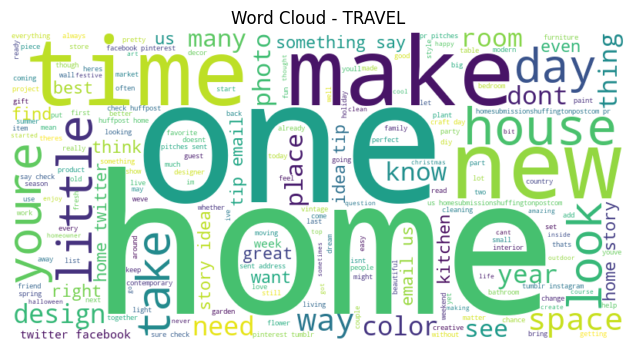

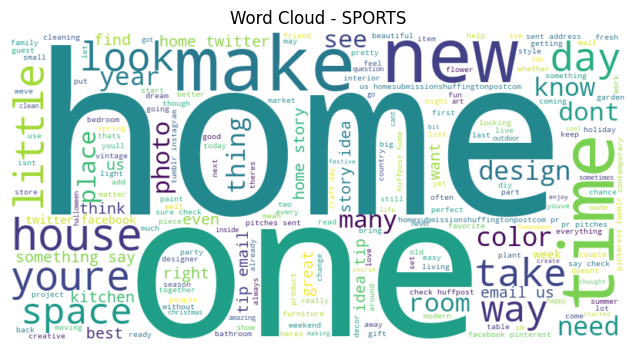

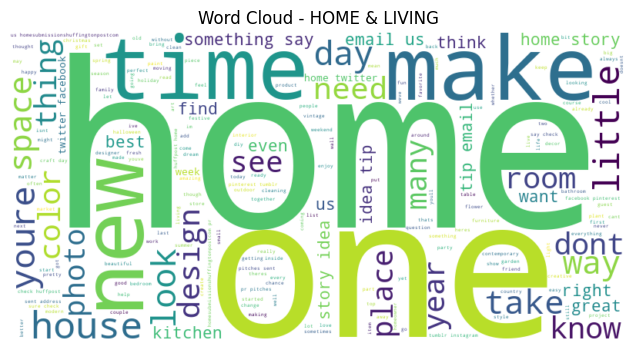

In [69]:
category_wordsets = {}

for cat in categories:
    texts = train_df[train_df["category"] == cat]["short_description" : "tes]
    
    # Combine all texts
    all_words = []
    for t in texts:
        all_words.extend(preprocess(t))
    
    # Word frequency
    word_counts = Counter(all_words)
    
    # Save full sorted list
    category_wordsets[cat] = [w for w, _ in word_counts.most_common(200)]
    
    # Generate word cloud
    wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_words))
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f"Word Cloud - {cat}")
    plt.axis("off")
    plt.show()


## 9. Keyword-based Classifier

In [70]:
def classify(text, top_n=10):
    tokens = preprocess(text)
    scores = {}
    
    for cat in categories:
        wordset = set(category_wordsets[cat][:top_n])
        overlap = len(set(tokens) & wordset)
        scores[cat] = overlap
    
    # Decide predicted label
    max_score = max(scores.values())
    best_cats = [c for c, s in scores.items() if s == max_score]
    
    if max_score == 0:
        return "unknown"         # no match
    elif len(best_cats) > 1:
        return random.choice(best_cats)   # tie-breaker
    else:
        return best_cats[0]


## 10.Experimentation

In [72]:
def evaluate(top_n):
    preds = test_df["short_description"].apply(lambda x: classify(x, top_n=top_n))
    acc = (preds == test_df["category"]).mean()
    return acc, preds

results = {}
for n in [10, 20, 30, 50, 100]:
    acc, preds = evaluate(n)
    results[n] = acc
    print(f"Top {n} words → Accuracy = {acc:.3f}")


Top 10 words → Accuracy = 0.079
Top 20 words → Accuracy = 0.090
Top 30 words → Accuracy = 0.107
Top 50 words → Accuracy = 0.126
Top 100 words → Accuracy = 0.195


## 11. Results & Reporting

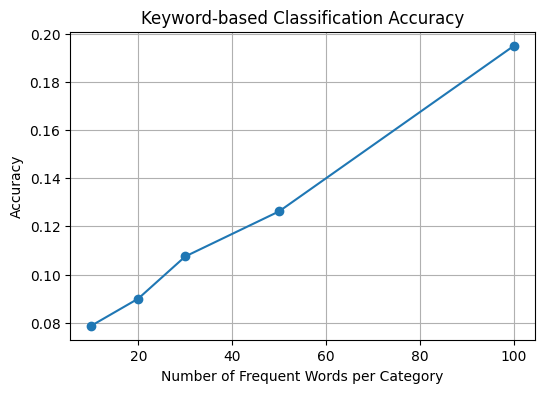

In [73]:
plt.figure(figsize=(6,4))
plt.plot(list(results.keys()), list(results.values()), marker="o")
plt.title("Keyword-based Classification Accuracy")
plt.xlabel("Number of Frequent Words per Category")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

## 12. Per-category accuracy

In [74]:
for n in [10, 20, 30, 50, 100]:
    _, preds = evaluate(n)
    per_cat = test_df.groupby("category").apply(
        lambda x: (preds.loc[x.index] == x["category"]).mean()
    )
    print(f"\nTop {n} words - Per-category accuracy:")
    print(per_cat)


C:\Users\bbuser\AppData\Local\Temp\ipykernel_22296\793380181.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  per_cat = test_df.groupby("category").apply(
C:\Users\bbuser\AppData\Local\Temp\ipykernel_22296\793380181.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  per_cat = test_df.groupby("category").apply(
C:\Users\bbuser\AppData\Local\Temp\ipykernel_22296\793380181.py:3: FutureWarning: DataFrameGroupBy.apply


Top 10 words - Per-category accuracy:
category
HOME & LIVING    0.060
POLITICS         0.045
SPORTS           0.045
TRAVEL           0.085
dtype: float64

Top 20 words - Per-category accuracy:
category
HOME & LIVING    0.16
POLITICS         0.09
SPORTS           0.05
TRAVEL           0.13
dtype: float64

Top 30 words - Per-category accuracy:
category
HOME & LIVING    0.125
POLITICS         0.110
SPORTS           0.045
TRAVEL           0.125
dtype: float64

Top 50 words - Per-category accuracy:
category
HOME & LIVING    0.110
POLITICS         0.100
SPORTS           0.085
TRAVEL           0.105
dtype: float64

Top 100 words - Per-category accuracy:
category
HOME & LIVING    0.160
POLITICS         0.155
SPORTS           0.135
TRAVEL           0.235
dtype: float64


C:\Users\bbuser\AppData\Local\Temp\ipykernel_22296\793380181.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  per_cat = test_df.groupby("category").apply(
